# Neural Network
This notebook applies a simple model to simple data.  
Data = Iris.  
Model = Fully Connected aka Dense aka Multi-Layer Perceptron (MLP).  
Notebook 01: No normalization. Test acc reaches 100% on some runs.

In [1]:
import datetime
print(datetime.datetime.now())
from platform import python_version
print('Python',python_version())
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

2022-09-03 13:09:14.635459
Python 3.10.0


In [2]:
from sklearn import datasets
from sklearn.utils import shuffle
iris = datasets.load_iris()
print('shape',iris.data.shape)
print('features',iris.feature_names)
print('labels',iris.target_names)
X = iris.data
y = iris.target
# At start, all species=0 come first and all species=2 come last.
# Important to shuffle rows before doing train/test split and train/valid split.
# Another way is using the sklearn train_test_split class.
X, y = shuffle(X, y, random_state=0)
print('X shape',X.shape)
print('y shape',y.shape)
num_instances = X.shape[0]
num_features =  X.shape[1]

shape (150, 4)
features ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
labels ['setosa' 'versicolor' 'virginica']
X shape (150, 4)
y shape (150,)


In [3]:
# TO DO: normalize
X

array([[5.8, 2.8, 5.1, 2.4],
       [6. , 2.2, 4. , 1. ],
       [5.5, 4.2, 1.4, 0.2],
       [7.3, 2.9, 6.3, 1.8],
       [5. , 3.4, 1.5, 0.2],
       [6.3, 3.3, 6. , 2.5],
       [5. , 3.5, 1.3, 0.3],
       [6.7, 3.1, 4.7, 1.5],
       [6.8, 2.8, 4.8, 1.4],
       [6.1, 2.8, 4. , 1.3],
       [6.1, 2.6, 5.6, 1.4],
       [6.4, 3.2, 4.5, 1.5],
       [6.1, 2.8, 4.7, 1.2],
       [6.5, 2.8, 4.6, 1.5],
       [6.1, 2.9, 4.7, 1.4],
       [4.9, 3.6, 1.4, 0.1],
       [6. , 2.9, 4.5, 1.5],
       [5.5, 2.6, 4.4, 1.2],
       [4.8, 3. , 1.4, 0.3],
       [5.4, 3.9, 1.3, 0.4],
       [5.6, 2.8, 4.9, 2. ],
       [5.6, 3. , 4.5, 1.5],
       [4.8, 3.4, 1.9, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [6.2, 2.8, 4.8, 1.8],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.8, 1.9, 0.4],
       [6.2, 2.9, 4.3, 1.3],
       [5. , 2.3, 3.3, 1. ],
       [5. , 3.4, 1.6, 0.4],
       [6.4, 3.1, 5.5, 1.8],
       [5.4, 3. , 4.5, 1.5],
       [5.2, 3.5, 1.5, 0.2],
       [6.1, 3. , 4.9, 1.8],
       [6.4, 2

In [4]:
X_train = X[:125]
y_train = y[:125]
X_test  = X[125:]
y_test  = y[125:]

Keras offers 2 means of building a model.  
1. The [Sequential class](https://keras.io/api/models/sequential/#sequential-class) is simple. It has an add(layer) method. It maintains layers in the order they were added. It allows linear models only. Every layer has one input and one output.
1. The [Functional API](https://keras.io/guides/functional_api/) is complex. It allows DAG models. Layers can be skipped, reused, and multiply connected.

The Dense layer has these constructor options.
1. num units
1. activation. Default=linear. Choices are relu, elu, softplus (smooth relu), softmax, sigmoid, tanh, exponential. There is an API so you can build your own.
1. use_bias. Default=True
1. kernel_initializer. Default="glorot_uniform"
1. regularizers for the bias, kernel, and activity. Default=None.

In [5]:
from tensorflow import keras
from keras import layers

In [6]:
inputs = keras.Input(shape=(num_features,))
inputs

<KerasTensor: shape=(None, 4) dtype=float32 (created by layer 'input_1')>

In [7]:
dense1 = layers.Dense(64, activation="relu")(inputs)
dense2 = layers.Dense(64, activation="relu")(dense1)
outputs = layers.Dense(3)(dense2)
outputs

2022-09-03 13:09:26.251898: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


<KerasTensor: shape=(None, 3) dtype=float32 (created by layer 'dense_2')>

In [8]:
model = keras.Model(inputs=inputs, outputs=outputs, name="MLP_1")
model.summary()

Model: "MLP_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense (Dense)               (None, 64)                320       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 3)                 195       
                                                                 
Total params: 4,675
Trainable params: 4,675
Non-trainable params: 0
_________________________________________________________________


Explain the number of trainable parameters:
1. Dense_0: 4 in * 64 out +64 bias = 256 + 64 = 320 
1. Dense_1: 64 in * 64 out + 64 bias = 4096 + 64 = 4160
1. Dense_2: 64 in * 3 out + 3 bias = 192 + 3 = 195

In [9]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.RMSprop(),
    metrics=["accuracy"],
)

Note on model.fit() and model.evaluate()  
Both methods are written to be customized.

In [10]:
EPOCHS=100
history = model.fit(X_train, y_train, batch_size=64, epochs=EPOCHS, validation_split=0.2)

Epoch 1/100
2/2 [==============================] - 1s 183ms/step - loss: 1.4611 - accuracy: 0.0600 - val_loss: 1.0638 - val_accuracy: 0.2400
Epoch 2/100
2/2 [==============================] - 0s 53ms/step - loss: 1.0373 - accuracy: 0.4200 - val_loss: 0.9320 - val_accuracy: 0.2800
Epoch 3/100
2/2 [==============================] - 0s 36ms/step - loss: 0.9336 - accuracy: 0.4000 - val_loss: 0.8617 - val_accuracy: 0.7600
Epoch 4/100
2/2 [==============================] - 0s 43ms/step - loss: 0.9041 - accuracy: 0.6800 - val_loss: 0.8280 - val_accuracy: 0.7600
Epoch 5/100
2/2 [==============================] - 0s 30ms/step - loss: 0.8535 - accuracy: 0.6500 - val_loss: 0.7554 - val_accuracy: 0.7600
Epoch 6/100
2/2 [==============================] - 0s 44ms/step - loss: 0.8148 - accuracy: 0.6600 - val_loss: 0.7174 - val_accuracy: 0.9200
Epoch 7/100
2/2 [==============================] - 0s 34ms/step - loss: 0.7877 - accuracy: 0.7300 - val_loss: 0.7238 - val_accuracy: 0.9200
Epoch 8/100
2/2 [==

2/2 [==============================] - 0s 31ms/step - loss: 0.2677 - accuracy: 0.8900 - val_loss: 0.1528 - val_accuracy: 1.0000
Epoch 60/100
2/2 [==============================] - 0s 32ms/step - loss: 0.2414 - accuracy: 0.9700 - val_loss: 0.1510 - val_accuracy: 1.0000
Epoch 61/100
2/2 [==============================] - 0s 24ms/step - loss: 0.2612 - accuracy: 0.9100 - val_loss: 0.1551 - val_accuracy: 0.9200
Epoch 62/100
2/2 [==============================] - 0s 34ms/step - loss: 0.2363 - accuracy: 0.9600 - val_loss: 0.1792 - val_accuracy: 0.9200
Epoch 63/100
2/2 [==============================] - 0s 51ms/step - loss: 0.2519 - accuracy: 0.9300 - val_loss: 0.1428 - val_accuracy: 1.0000
Epoch 64/100
2/2 [==============================] - 0s 41ms/step - loss: 0.2236 - accuracy: 0.9800 - val_loss: 0.1520 - val_accuracy: 0.9600
Epoch 65/100
2/2 [==============================] - 0s 31ms/step - loss: 0.2249 - accuracy: 0.9700 - val_loss: 0.1429 - val_accuracy: 1.0000
Epoch 66/100
2/2 [========

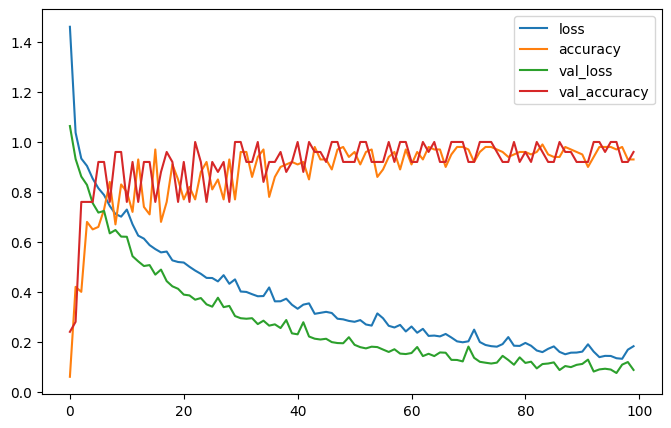

In [11]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

In [12]:
test_scores = model.evaluate(X_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

1/1 - 0s - loss: 0.1084 - accuracy: 1.0000 - 18ms/epoch - 18ms/step
Test loss: 0.10842899978160858
Test accuracy: 1.0
